<a href="https://colab.research.google.com/github/vubanc/BikeAllocationOptimization/blob/main/Bike%20Allocation%20Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Bike Allocation Optimization Model**

In this project, a linear programming model has been formulated to find the optimal allocation of 80 bikes among 8 different bike stations in Fort Smith, Arkansas. The model was formulated and solved for two cases:
- For a basic scenario where trip rates were generated assuming constant bike availability (5 bikes available at each station at all times)
- For 50 hypothetical scenarios where trip rates were generated assuming varying bike availability (the availability of bikes is normally distributed) with Monte Carlo Simulation.

The project used data from an actual bikesharing program in the state of Arkansas and the results were presented to the stakeholders of the program. The project is meant to aid a data-driven expansion plan (expanding the number of bikes from 40 to 80 bikes) for the bikesharing program.

## Importing Libraries and Dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
!pip install pulp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.3/14.3 MB 56.4 MB/s eta 0:00:00


In [26]:
import pandas as pd
import numpy as np
from pulp import*

import matplotlib.pyplot as plt
import seaborn as sns

import datetime

In [8]:
import warnings
warnings.filterwarnings("ignore")

In [9]:
df1 = pd.read_csv("/content/drive/MyDrive/Work/Bikesharing/CombinedRentals_AllStations.csv")
df2 = pd.read_csv("/content/drive/MyDrive/Work/Bikesharing/CombinedRentals_NewStations.csv")
df_userInfo = pd.read_csv("/content/drive/MyDrive/Work/Bikesharing/TripLevelUserInfo.csv")

In [10]:
print(df1.shape)
df1.head(2)

(3208, 20)


,index,id,user,user_id,user_phone,start_station,start_time,start_time_local,end_station,end_time,end_time_local,kilometers,miles,message_count,type,duration (seconds),rating,device_id,bike_type,Date
0,0,a122c5d2-dfee-4770-ad9a-8be16ebea7ff,Chrys Estrada,7d8b8c64-c458-406b-87c3-bb9a8503691d,14792358911,Riverfront Park,2023-07-03 01:11:47.468326+00:00,2023-07-02 19:11:47.468326-06:00,Riverfront Park,2023-07-03 01:34:25.468326+00:00,2023-07-02 19:34:25.468326-06:00,1.019,0.633176,99,22,1358,NaN,Yz6Th9lcdq,Regular Bike,2023-07-02
1,2,6f51e22b-4b99-4f8c-8aa0-34708a3db3f9,Gabriel Racher,a4f68a35-d13a-42d6-baa3-8cc621258b15,15015540574,Riverfront Park,2023-07-02 17:00:50.325631+00:00,2023-07-02 11:00:50.325631-06:00,Convention Center,2023-07-02 17:14:54.325631+00:00,2023-07-02 11:14:54.325631-06:00,1.885,1.171282,20,22,844,NaN,OuSbb4mJBe,Regular Bike,2023-07-02


In [11]:
print(df2.shape)
df2.head(2)

(3050, 20)


,index,id,user,user_id,user_phone,start_station,start_time,start_time_local,end_station,end_time,end_time_local,kilometers,miles,message_count,type,duration (seconds),rating,device_id,bike_type,Date
0,0,a122c5d2-dfee-4770-ad9a-8be16ebea7ff,Chrys Estrada,7d8b8c64-c458-406b-87c3-bb9a8503691d,14792358911,Riverfront Park,2023-07-03 01:11:47.468326+00:00,2023-07-02 19:11:47.468326-06:00,Riverfront Park,2023-07-03 01:34:25.468326+00:00,2023-07-02 19:34:25.468326-06:00,1.019,0.633176,99,22,1358,NaN,Yz6Th9lcdq,Regular Bike,2023-07-02
1,2,6f51e22b-4b99-4f8c-8aa0-34708a3db3f9,Gabriel Racher,a4f68a35-d13a-42d6-baa3-8cc621258b15,15015540574,Riverfront Park,2023-07-02 17:00:50.325631+00:00,2023-07-02 11:00:50.325631-06:00,Convention Center,2023-07-02 17:14:54.325631+00:00,2023-07-02 11:14:54.325631-06:00,1.885,1.171282,20,22,844,NaN,OuSbb4mJBe,Regular Bike,2023-07-02


In [12]:
print(df_userInfo.shape)
df_userInfo.head(2)

(386, 40)


,id_x,user,user_id,user_phone,start_station,start_time,start_time_local,end_station,end_time,end_time_local,...,Education,Employment,Email Address,Number of Household Vehicles,Desired Fare,Feeling,Primary Mode,Employed Home ZIP,Employed Work ZIP,Employed
0,431261fb-3109-4af4-9662-050feac0e9d9,Madi Merrill,891db1b5-1635-4a89-968a-a6e2d9f16f62,4792089896,Chafee Crossing,2023-06-27 01:33:51.849467+00:00,2023-06-26 19:33:51.849467-06:00,Chafee Crossing,2023-06-27 02:29:31.849467+00:00,2023-06-26 20:29:31.849467-06:00,...,High school/ GED,Working-Full time,NaN,1,0.1,5.0,Personal Car,NaN,NaN,NaN
1,ac842052-7d47-44b5-9a43-fcd1f5c80c17,Madi Merrill,891db1b5-1635-4a89-968a-a6e2d9f16f62,4792089896,Chafee Crossing,2023-06-02 01:48:39.423295+00:00,2023-06-01 19:48:39.423295-06:00,Chafee Crossing,2023-06-02 02:58:28.423295+00:00,2023-06-01 20:58:28.423295-06:00,...,High school/ GED,Working-Full time,NaN,1,0.1,5.0,Personal Car,NaN,NaN,NaN


## Extracting Parameters

In the following cells, five parameters are extracted from the data generated from the bikesharing program. The parameters are:
- Monthly demand for the bikesharing program.
- Total trip rate at station i for i=1,2,3,4,5,6,7,8.
- Low-income users' trip rate at station i for i=1,2,3,4,5,6,7,8.
- Carless users' trip rate at station i for i=1,2,3,4,5,6,7,8.
- Working users' trip rate at station i for i=1,2,3,4,5,6,7,8.

In [13]:
#Extracting monthly demand
total_days = max(pd.to_datetime(df1["start_time"])) - min(pd.to_datetime(df1["start_time"]))
print(f"Total number of days in operation: {total_days.days}")

total_trips = df1["id"].count()
print(f"Total number of trips: {total_trips}")

monthly_demand = total_trips*30/total_days.days
print(f"Monthly demand: {int(monthly_demand)} trips/month")

Total number of days in operation: 426
Total number of trips: 3208
Monthly demand: 225 trips/month


In [14]:
#Extracting trip rate at each station
def Ext_TripRate(df2, bike_mean, bike_std):
    df_tripRate = pd.DataFrame(df2.groupby("start_station")["id"].count())
    df_tripRate.columns = ["Trips"]
    df_tripRate["Days"] = 0

    stations = df2["start_station"].unique()
    new_stations = ["Riverfront Park", "Woodlawn Park", "Fort Smith Housing Authority"]

    #Specifying the number of days of operation for new stations and old stations
    for station in stations:
        if station in new_stations:
            first_trip_date = datetime.datetime.strptime("11-15-2022", "%m-%d-%Y").date()
        else:
            first_trip_date = datetime.datetime.strptime("05-02-2022", "%m-%d-%Y").date()
        last_trip_date = max(pd.to_datetime(df2["start_time"])).date()
        total_days = (last_trip_date - first_trip_date).days
        df_tripRate.loc[station,"Days"] = total_days

    #Creating an array of bike aviliability for 8 stations
    bike_availability = (np.random.normal(bike_mean, bike_std, 8)).astype(int)
    bike_availability = [i if i>0 else 1 for i in bike_availability] #Avergae availability must be more than 0
    bike_availability = [i if i<8 else 8 for i in bike_availability] #Avergae availability must be less than 8

    df_tripRate["Trip Rate"] = df_tripRate["Trips"]*30/(bike_availability*df_tripRate["Days"])

    print(f"Bike availability for current scenario: {bike_availability}")

    return df_tripRate

df_tripRate = Ext_TripRate(df2, 5, 0)
df_tripRate

Bike availability for current scenario: [5, 5, 5, 5, 5, 5, 5, 5]


,Trips,Days,Trip Rate
start_station,,,
32nd and Grand,228,427,3.203747
Chafee Crossing,957,427,13.447307
Convention Center,675,427,9.484778
Fort Smith Housing Authority,49,230,1.278261
Kinkead and Waldron,281,427,3.948478
MLK Park,155,427,2.177986
Riverfront Park,651,230,16.982609
Woodlawn Park,54,230,1.408696


In [15]:
#Extracting trip rates of low-income users at each station
def Ext_lowInc_tripRate(df_userInfo, df_tripRate):
    df_userInfo = df_userInfo[df_userInfo["Household Income"]!="I prefer not to answer"]
    df_userInfo["Income_level"] = np.where(df_userInfo["Household Income"].isin(["< $20,000", "<$20,000 - $34,999", "<$35,000 - $49,999"]), "low", "high")

    df_lowInc = pd.DataFrame(df_userInfo.groupby("start_station")["Income_level"].value_counts(normalize=True))
    df_lowInc.columns = ["% of LowInc Trips"]
    df_lowInc.reset_index(inplace=True)
    df_lowInc.loc[13] = pd.Series({'start_station':"Fort Smith Housing Authority", "Income_level":"low", "% of LowInc Trips": 0.1})

    df_lowInc = df_lowInc[df_lowInc["Income_level"]=="low"]
    df_lowInc.set_index("start_station", inplace=True)

    df_lowInc["LowInc Trip Rate"] = 0
    for station in df_lowInc.index:
        df_lowInc.loc[station, "LowInc Trip Rate"] = df_tripRate.loc[station, "Trip Rate"]*df_lowInc.loc[station, "% of LowInc Trips"]

    df_lowInc.drop("Income_level", axis=1, inplace=True)
    return df_lowInc

df_lowInc = Ext_lowInc_tripRate(df_userInfo, df_tripRate)
df_lowInc

,% of LowInc Trips,LowInc Trip Rate
start_station,,
32nd and Grand,1.000000,3.203747
Chafee Crossing,0.709459,9.540319
Convention Center,0.781250,7.409982
Kinkead and Waldron,0.988095,3.901472
MLK Park,0.625000,1.361241
Riverfront Park,0.636364,10.807115
Woodlawn Park,0.500000,0.704348
Fort Smith Housing Authority,0.100000,0.127826


In [16]:
#Extracting trip rates of captive users at each station
def Ext_captive_tripRate(df_userInfo, df_tripRate):
    df_userInfo["Captivity"] = 0
    df_userInfo["Captivity"] = np.where(df_userInfo["Number of Household Vehicles"].isin(["None"]), "captive", df_userInfo["Captivity"])
    df_userInfo["Captivity"] = np.where(df_userInfo["Number of Household Vehicles"].isin(["1", "2", "3 or more", np.nan]), "non-captive", df_userInfo["Captivity"])

    df_captive = pd.DataFrame(df_userInfo.groupby("start_station", group_keys=True)["Captivity"].value_counts(normalize=True))
    df_captive.columns = ["% of Captive Trips"]
    df_captive.reset_index(inplace=True)
    df_captive.loc[13] = pd.Series({'start_station':"Fort Smith Housing Authority", "Captivity":"captive", "% of Captive Trips": 0.1})
    df_captive.loc[14] = pd.Series({'start_station':"MLK Park", "Captivity":"captive", "% of Captive Trips": 0})


    df_captive = df_captive[df_captive["Captivity"]=="captive"]
    df_captive.set_index("start_station", inplace=True)

    df_captive["Captive Trip Rate"] = 0
    for station in df_captive.index:
        df_captive.loc[station, "Captive Trip Rate"] = df_tripRate.loc[station, "Trip Rate"]*df_captive.loc[station, "% of Captive Trips"]

    df_captive.drop("Captivity", axis=1, inplace=True)

    return df_captive

df_captive = Ext_captive_tripRate(df_userInfo, df_tripRate)
df_captive

,% of Captive Trips,Captive Trip Rate
start_station,,
32nd and Grand,0.210526,0.674473
Chafee Crossing,0.180851,2.431960
Convention Center,0.257143,2.438943
Kinkead and Waldron,0.021739,0.085836
Riverfront Park,0.269231,4.572241
Woodlawn Park,0.500000,0.704348
Fort Smith Housing Authority,0.100000,0.127826
MLK Park,0.000000,0.000000


In [17]:
#Extracting trip rates of working users at each station
def Ext_worker_tripRate(df_userInfo, df_tripRate):
    df_userInfo["Employed"] = np.where(df_userInfo["Employment"].isin(["Working-Full time", "Working - Part time"]), "working", "not working")

    df_worker = pd.DataFrame(df_userInfo.groupby("start_station")["Employed"].value_counts(normalize=True))
    df_worker.columns = ["% of Worker Trips"]
    df_worker.reset_index(inplace=True)
    df_worker.loc[13] = pd.Series({'start_station':"Woodlawn Park", "Employed":"working", "% of Worker Trips": 0.5})
    df_worker.loc[14] = pd.Series({'start_station':"Fort Smith Housing Authority", "Employed":"working", "% of Worker Trips": 0.1})

    df_worker = df_worker[df_worker["Employed"]=="working"]
    df_worker.set_index("start_station", inplace=True)

    df_worker["Worker Trip Rate"] = 0
    for station in df_worker.index:
        df_worker.loc[station, "Worker Trip Rate"] = df_tripRate.loc[station, "Trip Rate"]*df_worker.loc[station, "% of Worker Trips"]

    df_worker.drop("Employed", axis=1, inplace=True)

    return df_worker

df_worker = Ext_worker_tripRate(df_userInfo, df_tripRate)
df_worker

,% of Worker Trips,Worker Trip Rate
start_station,,
32nd and Grand,0.736842,2.360656
Chafee Crossing,0.191489,2.575016
Convention Center,0.400000,3.793911
Kinkead and Waldron,0.054348,0.214591
MLK Park,0.333333,0.725995
Riverfront Park,0.423077,7.184950
Woodlawn Park,0.500000,0.704348
Fort Smith Housing Authority,0.100000,0.127826


## Basic Optimization Model

In [21]:
def optimize(monthly_demand, df_tripRate, df_lowInc, df_captive, df_worker):
    stations = ['32nd and Grand', 'Chafee Crossing', 'Convention Center',
                'Fort Smith Housing Authority', 'Kinkead and Waldron',
                'MLK Park', 'Riverfront Park', 'Woodlawn Park']
    station_indices = [(i) for i in stations]

    model = LpProblem("OptimizeBikeAllocation", LpMaximize)

    x = LpVariable.dicts("Number_of_bikes", station_indices, lowBound = 5, upBound = 15, cat="Integer")

    model += lpSum([x[(i)]*df_tripRate.loc[i, "Trip Rate"] for i in stations])

    model += lpSum([x[(i)] for i in station_indices]) == 80
    model += lpSum([x[(i)]*df_tripRate.loc[i,"Trip Rate"] for i in stations]) >= monthly_demand
    model += lpSum([x[(i)]*df_lowInc.loc[i,"LowInc Trip Rate"] for i in stations]) >= 0.25*monthly_demand
    model += lpSum([x[(i)]*df_captive.loc[i, "Captive Trip Rate"] for i in stations]) >= 0.25*monthly_demand
    model += lpSum([x[(i)]*df_worker.loc[i,"Worker Trip Rate"] for i in stations]) >= 0.20*monthly_demand

    model.solve()
    df_bikes = pd.DataFrame({"Station":[i for i in stations], "Number of Bikes":[x[(i)].varValue for i in stations]})

    print(f"Solution: {LpStatus[model.status]}")
    print(f"Monthly ridership: {int(pulp.value(model.objective))} trips/month")
    return df_bikes

In [22]:
optimize(monthly_demand, df_tripRate, df_lowInc, df_captive, df_worker)

Solution: Optimal
Monthly ridership: 698 trips/month


,Station,Number of Bikes
0,32nd and Grand,5.0
1,Chafee Crossing,15.0
2,Convention Center,15.0
3,Fort Smith Housing Authority,5.0
4,Kinkead and Waldron,15.0
5,MLK Park,5.0
6,Riverfront Park,15.0
7,Woodlawn Park,5.0


## Linear Programming Model with Monte Carlo Simulation

In [24]:
df_allScenarios = pd.DataFrame({"Station": ['32nd and Grand', 'Chafee Crossing', 'Convention Center',
                'Fort Smith Housing Authority', 'Kinkead and Waldron',
                'MLK Park', 'Riverfront Park', 'Woodlawn Park']})
df_allScenarios.set_index("Station", inplace=True)

for i in range(50):
    print(f"Scenario {i}:")
    df_tripRate = Ext_TripRate(df2, 4, 2)
    df_lowInc = Ext_lowInc_tripRate(df_userInfo, df_tripRate)
    df_captive = Ext_captive_tripRate(df_userInfo, df_tripRate)
    df_worker = Ext_worker_tripRate(df_userInfo, df_tripRate)
    df_bikes = optimize(monthly_demand, df_tripRate, df_lowInc, df_captive, df_worker) #number of bikes for this scenario
    print("\n")
    df_bikes.set_index("Station", inplace=True)
    df_allScenarios = pd.concat([df_allScenarios, df_bikes["Number of Bikes"]], axis=1) #Adding the number of bikes to df with all scenarios

Scenario 0:
Bike availability for current scenario: [2, 5, 1, 4, 4, 5, 5, 3]
Solution: Optimal
Monthly ridership: 1343 trips/month


Scenario 1:
Bike availability for current scenario: [4, 2, 3, 4, 8, 4, 1, 3]
Solution: Optimal
Monthly ridership: 2120 trips/month


Scenario 2:
Bike availability for current scenario: [3, 1, 4, 6, 2, 3, 5, 3]
Solution: Optimal
Monthly ridership: 1651 trips/month


Scenario 3:
Bike availability for current scenario: [1, 2, 3, 6, 3, 3, 2, 3]
Solution: Optimal
Monthly ridership: 1686 trips/month


Scenario 4:
Bike availability for current scenario: [3, 1, 4, 3, 3, 1, 6, 6]
Solution: Optimal
Monthly ridership: 1638 trips/month


Scenario 5:
Bike availability for current scenario: [4, 2, 1, 8, 4, 1, 2, 5]
Solution: Optimal
Monthly ridership: 2071 trips/month


Scenario 6:
Bike availability for current scenario: [3, 4, 2, 4, 3, 5, 6, 3]
Solution: Optimal
Monthly ridership: 976 trips/month


Scenario 7:
Bike availability for current scenario: [4, 1, 3, 4, 6, 3,

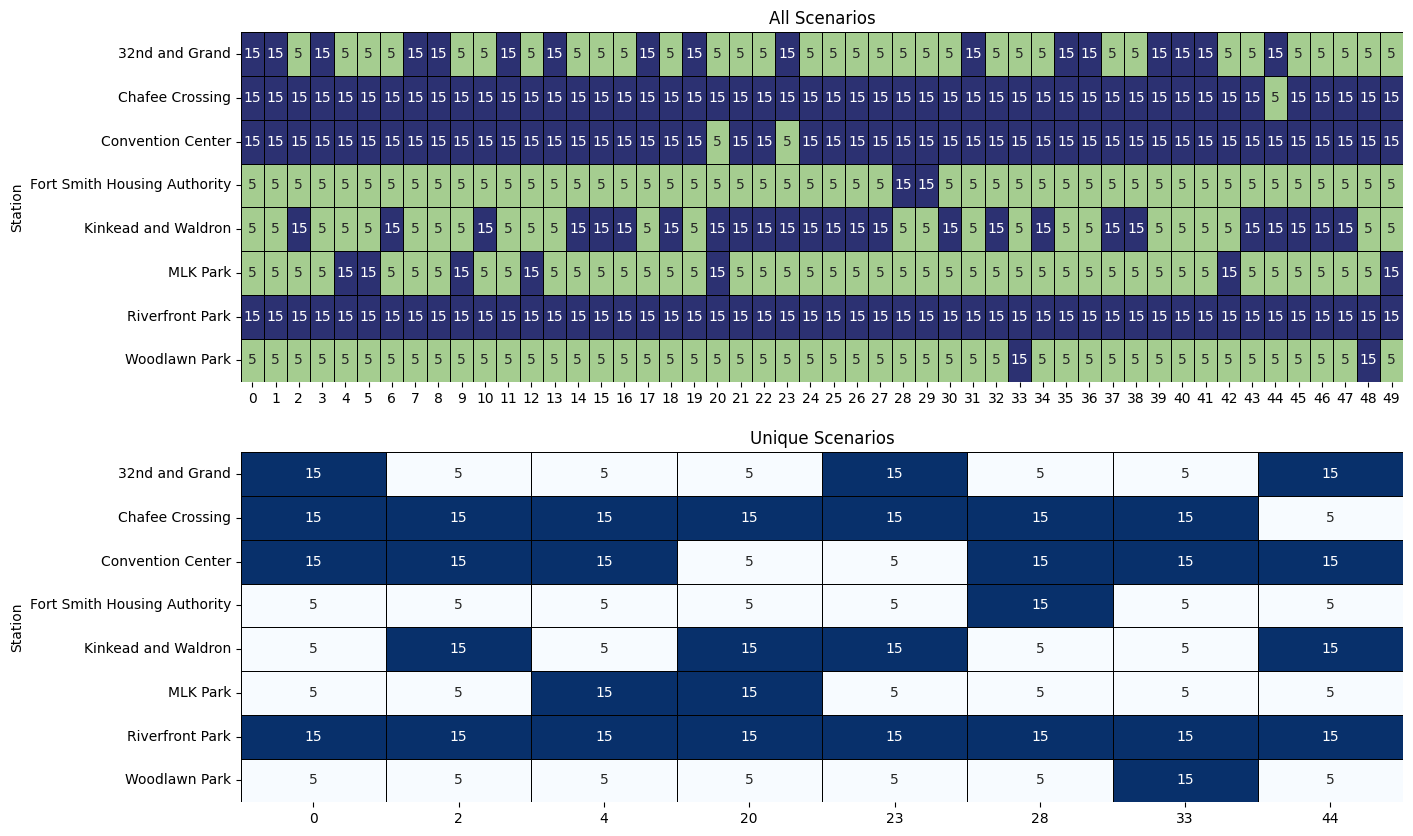

In [27]:
df_allScenarios = df_allScenarios.astype(int)
df_allScenarios.columns = np.arange(0,50,1)
df_uniqueScenarios = df_allScenarios.T.drop_duplicates().T

fig, axs = plt.subplots(2,1, figsize=(15,10))
axs[0].set_title("All Scenarios")
axs[1].set_title("Unique Scenarios")

sns.heatmap(df_allScenarios, cmap="crest", annot=True, linewidths=0.5, linecolor='black', cbar=False, ax=axs[0])
sns.heatmap(df_uniqueScenarios, cmap="Blues", annot=True, linewidths=0.5, linecolor='black', cbar=False, ax=axs[1])

fig.savefig("Monte-carlo Scenarios", bbox_inches="tight")

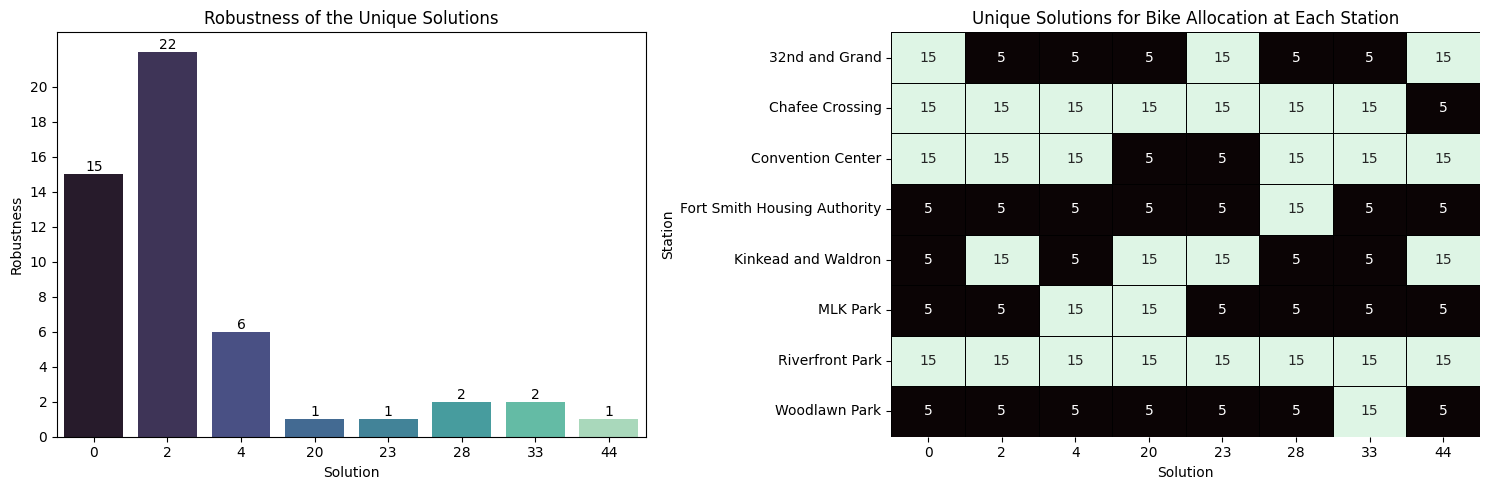

In [28]:
df_robustness = {}

for s1 in df_uniqueScenarios:
    df_robustness[s1] = 0
    for s2 in df_allScenarios:
        if (df_uniqueScenarios[s1]!=df_allScenarios[s2]).sum() == 0:
            df_robustness[s1] += 1

df_robustness = pd.DataFrame(df_robustness, index=["Counts"]).T

fig,axs = plt.subplots(1,2, figsize=(15,5))
sns.barplot(data=df_robustness, x=df_robustness.index, y=df_robustness["Counts"], palette="mako", ax=axs[0])
axs[0].bar_label(axs[0].containers[0])
axs[0].set_yticks(ticks=np.arange(0, max(df_robustness["Counts"]), 2))
axs[0].set_yticklabels(np.arange(0, max(df_robustness["Counts"]), 2))
axs[0].set_xlabel("Solution")
axs[0].set_ylabel("Robustness")
axs[0].set_title("Robustness of the Unique Solutions")

sns.heatmap(df_uniqueScenarios, cmap="mako", annot=True, linewidths=0.5, linecolor='black', cbar=False, ax=axs[1])
axs[1].set_title("Unique Solutions for Bike Allocation at Each Station")
axs[1].set_xlabel("Solution")

plt.tight_layout()
fig.savefig("Robust Solution", bbox_inches="tight")

Hence, solution "2" (optimal in 22 scenarios) and solution "0" (optimal in 15 scenarios) were the most robust among the 7 unique solutions. Either of these can be selected as the final allocation plan for the bikesharing program.